In [ ]:
%pip install -e ../

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import exoplanet_lecture_utils as elu

/Users/fdannert/miniconda3/lib/python3.8/site-packages/radvel/gp.py:32: ImportWarning: celerite not installed. GP kernals using celerite will not work. Try installing celerite using 'pip install celerite'
  warnings.warn("celerite not installed. GP kernals using celerite will not work. \


# EXTRASOLAR PLANETS - Part 1.3
The goal of this project part is to find candidate detections of an exoplanet in the RV-data of a mystery system using Fourier transforms.

## Importing the data

In [2]:
data = pd.read_csv('https://share.phys.ethz.ch/~ipa/exoplanet_lecture_FS24/mystery_system_rv.csv')

In [ ]:
list(data.columns.values)

#
# 'mnvel' is the measured radial velocity in units m/s
#

In [ ]:
list(data["tel"].unique())

#
# 'tel' is the telescope which obtained the data
#

Let's first plot the RV data versus time. Why does the data jump around so much, and is there something we can do to correct for it? (try colour-coding the data by telescope)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))

# Plot

plt.title('RV-signal of the mystery system obtained from different instruments')
plt.legend()
plt.show()

For constructing the periodogram we use the `lombscargle` function from the scipy package. This function takes the time and RV-data as input and returns the power of the signal at different frequencies. The frequency is the inverse of the period, so we can use the period as the x-axis of the periodogram.

In [ ]:
from scipy.signal import lombscargle            # use the scipy docs online to look up what inputs to give to these tools 
from scipy.ndimage import gaussian_filter1d     # in order to produce your periodogram.

periods = np.logspace(np.log10(0.1), np.log10(10000), 5000)
w = 2*np.pi/periods



# EXTRASOLAR PLANETS - Part 1.4
This demonstrates a fit for longest period planet (4910 days). For the fit to converge it is essential to provide good initial guesses for the parameters.

Try to estimate the period of the planet as precisely as possible from the periodogram (`period`). Also, think about upper and lower limits on the period that you can supply to help the fit converge (`min_period`, `max_period`). From plotting the raw RV data you can also estimate the RV semi-amplitude (`kamp`). In case we have no prior information on the eccentricity, we use the conservative estimate that the eccentricity is less than 0.5 (`emax`).

In [3]:
planet_guess = [
    {'period': 4910.,  # in days
     'kamp': 100.,  # in m/s
     'emax': 0.5,
     'min_period': 4700.,  # in days
     'max_period': 5500.}  # in days
]

Now we initialize the fitting algorithm (based on the `radvel` package) with the initial guesses and the data.

In [4]:
fitter = elu.RadvelWrapper(data=data,
                           guesses=planet_guess)

We can now fit the model to the data, plot the results and save them in the `results` array.

Initial loglikelihood = -645415.794966
Final loglikelihood = -345185.921296
parameter                     value      vary
per1                        5279.34       True
tc1                         56891.4       True
secosw1                   -0.472535       True
sesinw1                    0.140091       True
logk1                       3.83512       True
dvdt                              0      False
curv                              0      False
gamma_HARPN                 27388.5      False
jit_HARPN                  0.955511      False
gamma_HARPS                 27438.1      False
jit_HARPS                  0.955511      False
gamma_HRS                   28390.9      False
jit_HRS                    0.955511      False
gamma_KECK                 -35.7765      False
jit_KECK                   0.955511      False
gamma_LICK                  2.60112      False
jit_LICK                   0.955511      False
gamma_SOPHIE                27429.2      False
jit_SOPHIE                 0.955

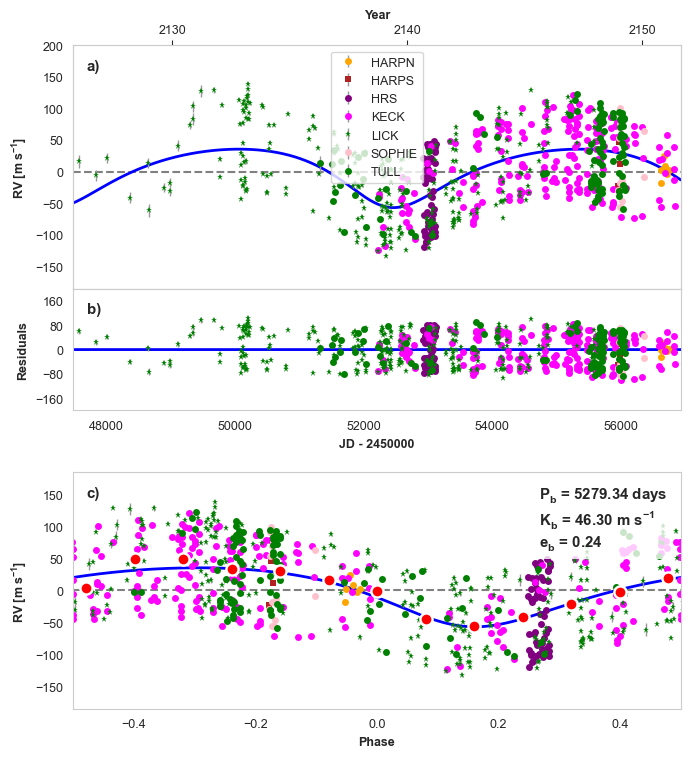

In [5]:
fitter.max_likelihood_fit()
fitter.plot_rv_fit()
results = fitter.get_posterior()

Here are the results of the fit. Note that `kamp` is given in m/s and `period` in days.

In [6]:
print(results)

[{'kamp': 46.29881199676024, 'period': 5279.337880967012, 'e': 0.24291460895730552}]


## A tip for advanced analyses
To identify planets with smaller RV amplitudes, it can be very useful to subtract the fits of already identified planets from the data. Then the periodogram of this 'cleaned' data can be used to identify additional planets. This process can be repeated iteratively to identify multiple planets in the same system.

In [7]:
data_subtracted = fitter.subtract_fit_from_data()

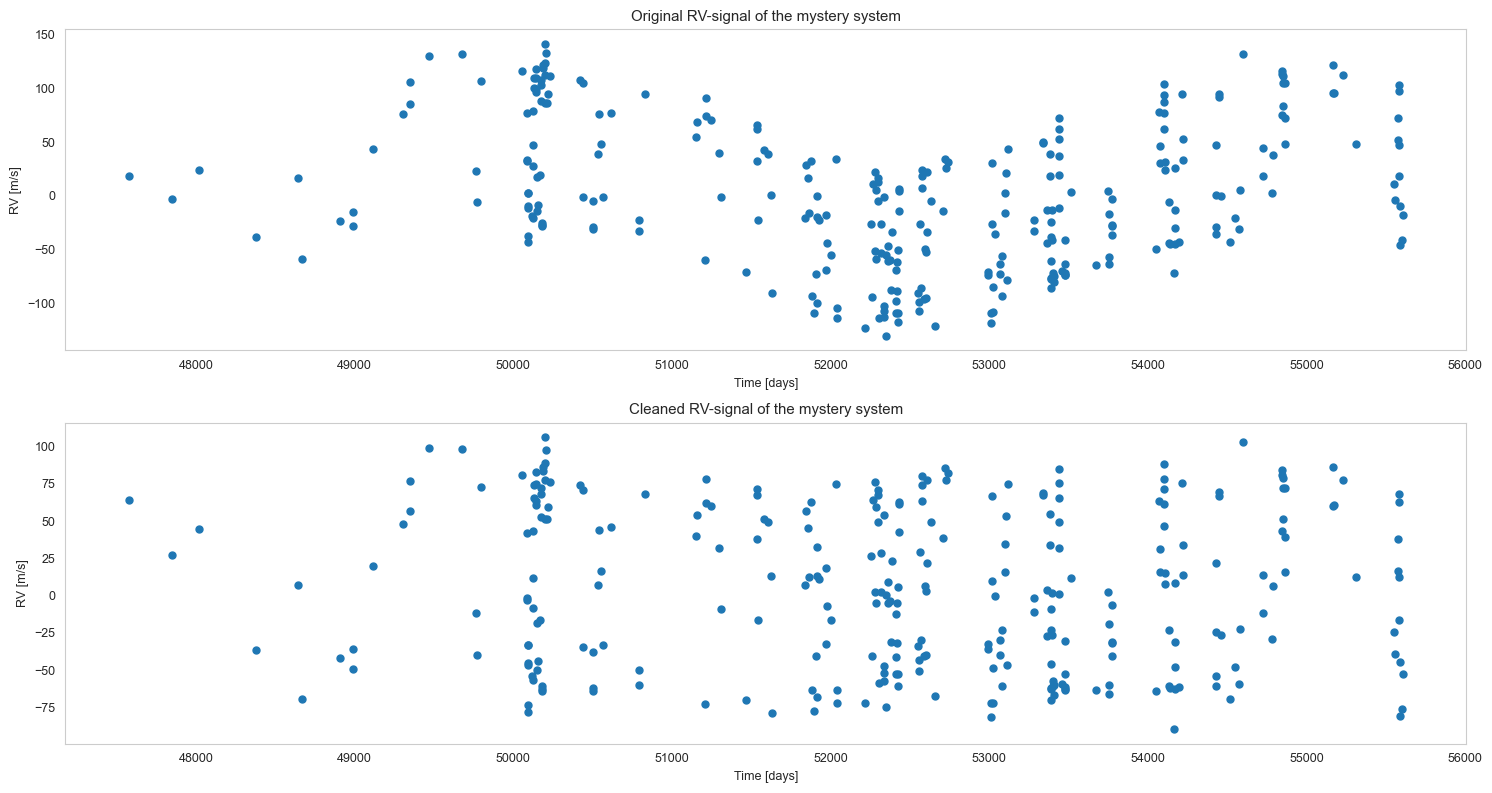

In [9]:
fig, ax = plt.subplots(figsize=(15, 8), nrows=2)
ax[0].scatter(data['time'][data['tel'] == 'LICK'], data['mnvel'][data['tel'] == 'LICK'])
ax[0].set_title('Original RV-signal of the mystery system')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('RV [m/s]')

ax[1].scatter(data_subtracted['time'][data_subtracted['tel'] == 'LICK'], data_subtracted['mnvel'][data_subtracted['tel'] == 'LICK'])
ax[1].set_title('Cleaned RV-signal of the mystery system')
ax[1].set_xlabel('Time [days]')
ax[1].set_ylabel('RV [m/s]')

plt.tight_layout()
plt.show()